# License for code pushes on Github 2020 - 2024

See:

* <https://github.blog/news-insights/policy-news-and-insights/racing-into-2025-with-new-github-innovation-graph-data/>
* <https://github.com/github/innovationgraph/blob/main/docs/datasheet.md>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/github/innovationgraph/refs/heads/main/data/licenses.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,16643,16644,16645,16646,16647,16648,16649,16650,16651,16652
num_pushers,738,217,201,152,182,312,3082,1215,938,647,...,1165,1006,810,186,167,144,136,238,337,174
spdx_license,MIT,NOASSERTION,Apache-2.0,GPL-3.0,MIT,MIT,MIT,GPL-3.0,NOASSERTION,Apache-2.0,...,Apache-2.0,NOASSERTION,GPL-3.0,BSD-3-Clause,AGPL-3.0,GPL-2.0,CC0-1.0,MIT,MIT,Apache-2.0
iso2_code,AE,AE,AE,AE,AL,AM,AR,AR,AR,AR,...,ZA,ZA,ZA,ZA,ZA,ZA,ZA,ZM,ZW,ZW
year,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024
quarter,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4


In [3]:
# % of unique license / person pushers by license.
(df.groupby('spdx_license')['num_pushers'].sum().sort_values(
    ascending=False
) / df['num_pushers'].sum() * 100).round(2)

spdx_license
MIT                   45.52
Apache-2.0            14.83
NOASSERTION           13.88
GPL-3.0               12.15
BSD-3-Clause           2.52
AGPL-3.0               2.32
GPL-2.0                2.21
CC0-1.0                1.28
Unlicense              1.15
MPL-2.0                0.80
BSD-2-Clause           0.76
LGPL-3.0               0.65
CC-BY-4.0              0.51
LGPL-2.1               0.40
ISC                    0.24
CC-BY-SA-4.0           0.20
0BSD                   0.14
EPL-2.0                0.12
WTFPL                  0.08
MIT-0                  0.05
BSL-1.0                0.05
BSD-3-Clause-Clear     0.04
EPL-1.0                0.03
Zlib                   0.03
EUPL-1.2               0.02
UPL-1.0                0.01
MulanPSL-2.0           0.01
Artistic-2.0           0.00
OFL-1.1                0.00
OSL-3.0                0.00
Name: num_pushers, dtype: float64

In [4]:
# Classify licenses.
df['License type'] = df['spdx_license'].replace(
    {'MIT': 'Attribution',
     'GPL-3.0': 'Copyleft',
     'Apache-2.0': 'Attribution',
     'NOASSERTION': 'No license',
     'BSD-3-Clause': 'Attribution',
     'GPL-2.0': 'Copyleft',
     'AGPL-3.0': 'Copyleft',
     'Unlicense': 'Public domain',
     'CC0-1.0': 'Public domain',
     'MPL-2.0': 'Copyleft',
     'BSD-2-Clause': 'Attribution',
     'LGPL-3.0': 'Copyleft',
     'CC-BY-4.0': 'Attribution',
     'LGPL-2.1': 'Copyleft',
     'ISC': 'Attribution',
     'CC-BY-SA-4.0': 'Attribution',
     '0BSD': 'Public domain',
     'EPL-2.0': 'Copyleft',
     'WTFPL': 'Public domain',
     'BSL-1.0': 'Proprietary',
     'Zlib': 'Attribution',
     'EPL-1.0': 'Copyleft',
     'MIT-0': 'Public domain',
     'EUPL-1.2': 'Copyleft',
     'BSD-3-Clause-Clear': 'Attribution',
     'UPL-1.0': 'Attribution',
     'Artistic-2.0': 'Attribution',
     'MulanPSL-2.0': 'Attribution',
     'OFL-1.1': 'Copyleft',
     'OSL-3.0': 'Copyleft',
    }
)

In [5]:
df['License type'].value_counts()

License type
Attribution      7143
Copyleft         5614
Public domain    2070
No license       1727
Proprietary        99
Name: count, dtype: int64

In [6]:
# % license / persons by license.
(df.groupby('License type')['num_pushers'].sum().sort_values(
    ascending=False
) / df['num_pushers'].sum() * 100).round(1)

License type
Attribution      64.7
Copyleft         18.7
No license       13.9
Public domain     2.7
Proprietary       0.0
Name: num_pushers, dtype: float64

In [7]:
# Make year and quarter into datetime.
yq = pd.PeriodIndex.from_fields(year=df['year'], quarter=df['quarter'])
df['Quarter'] = yq.to_timestamp()

In [8]:
# Break down counts by quarter and license type.
by_dt_license = (df.groupby(['Quarter', 'License type'])
                 ['num_pushers']
                 .sum())
license_sums = (by_dt_license
                .reset_index()
                .pivot(index='Quarter',
                       columns='License type',
                       values='num_pushers')
               )
license_sums

License type,Attribution,Copyleft,No license,Proprietary,Public domain
Quarter,,,,,
2020-01-01,1002718,300815,266613,384,29357
2020-04-01,1225981,331296,288349,418,35245
2020-07-01,1189410,311201,276477,704,39671
2020-10-01,1268005,346061,287127,854,52367
2021-01-01,1310626,364074,294260,925,55025
2021-04-01,1343426,363924,293346,967,52120
2021-07-01,1223443,353326,290098,852,48349
2021-10-01,1281097,384223,304395,915,57761
2022-01-01,1361503,418789,325160,1108,58831


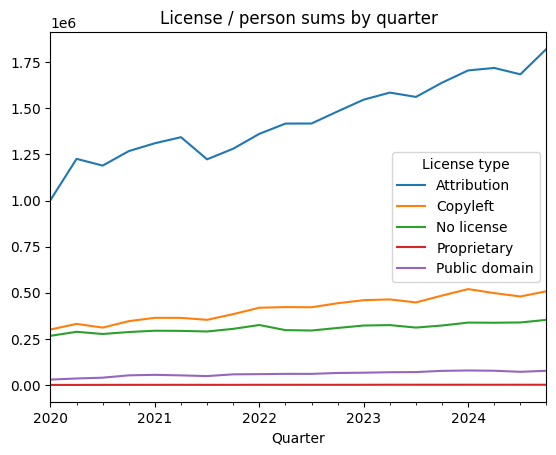

In [9]:
license_sums.plot(title='License / person sums by quarter');

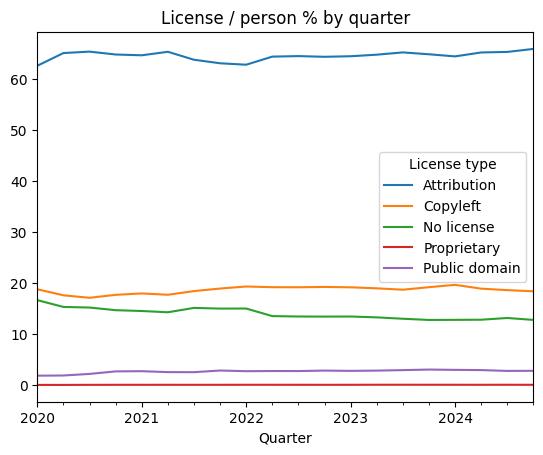

In [10]:
# % License / persons per quarter by license.
license_pcts = license_sums.div(
    license_sums.sum(axis='columns'), axis='index') * 100
license_pcts.plot(title='License / person % by quarter');